In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rn
from cvxopt import solvers, matrix
import seaborn as sns

# Question 1

In [2]:
reward_fnx1 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,1]])

reward_fnx2 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,-100,-100,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,-100,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,0,0,-100,-100,-100,0],
         [0,0,0,0,0,0,-100,0,0,0],
         [0,0,0,0,0,0,0,0,0,10]])

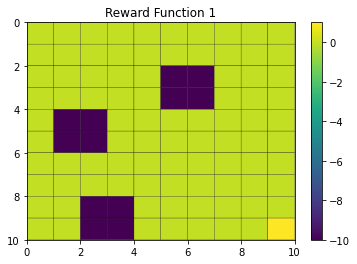

In [3]:
plt.pcolor(reward_fnx1,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 1")
plt.show()

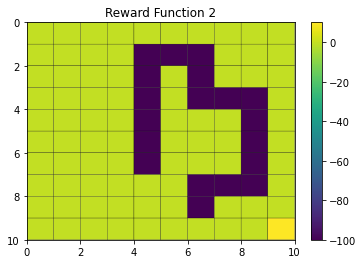

In [4]:
plt.pcolor(reward_fnx2,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 2")
plt.show()

# Question 2

In [5]:
w = 0.1
gamma = 0.8
epsilon = 0.01

In [6]:
# initialize the state space
k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1

In [7]:
#  get the probabiliy transition matrix for moving from one state to another
def state_transition_probabilities(w):
    P_up= np.zeros((100,100)) #Up
    P_down= np.zeros((100,100)) #Down
    P_left= np.zeros((100,100)) #Left
    P_right= np.zeros((100,100)) #Right
 
    for i in range(0,100):
        if(i%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-1]=1-w+w/4
        if(i-10<0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-10]=w/4
        if(i+10>99):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+10]=w/4
        if((i+1)%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+1]=w/4
        if(i%10==0):                     
            P_up[i][i]+=1-w   
        
    for i in range(0,100):
        if(i%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-1]=w/4
        if(i-10<0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-10]=w/4
        if(i+10>99):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+10]=w/4
        if((i+1)%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+1]=1-w+w/4
        if((i+1)%10==0):                      
            P_down[i][i]+=1-w
    
    for i in range(0,100):
        if(i%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-1]=w/4
        if(i-10<0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-10]=1-w+w/4
        if(i+10>99):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+10]=w/4
        if((i+1)%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+1]=w/4
        if(i-10<0):                      
            P_left[i][i]+=1-w

    for i in range(0,100):
        if(i%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-1]=w/4
        if(i-10<0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-10]=w/4
        if(i+10>99):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+1]=w/4
        if(i+10>99):                      
            P_right[i][i]+=1-w

    return P_up, P_down, P_left, P_right


def value_iteration(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon):
    current_state=np.zeros(100)
    delta=np.inf
    r = (reward_fnx.T).ravel()
    steps = 0
    while(delta>epsilon):
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    copy_of_state = current_state.copy()
    current_state = np.transpose(current_state.reshape(10,10))
    return current_state, steps,up,down,left,right,copy_of_state



def value_iteration_with_intervals(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon,optimal_steps=32):
    current_state=np.zeros(100)
    snapshot = []
    delta=np.inf
    r = (reward_fnx.T).ravel()
    intervals = np.round(np.linspace(1,optimal_steps-1,5))
    steps = 0
    while(delta>epsilon):
        if steps in intervals:
            current_state_ = np.copy(current_state)
            current_state_ = np.transpose(current_state_.reshape(10,10))
            snapshot.append(current_state_) 
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    return snapshot


## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[j][i]
            arrow = ''
            if(c == 0):
                arrow = u'↑'
            elif(c == 1):
                arrow = u'↓'
            elif(c == 2):
                arrow = u'←'
            else:
                arrow = u'→'
            
            ax.text(i + 0.5, j + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()


In [8]:
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 22


Text(0.5, 1.0, 'Optimal state values for Reward function 1(After Iterations = 22)')

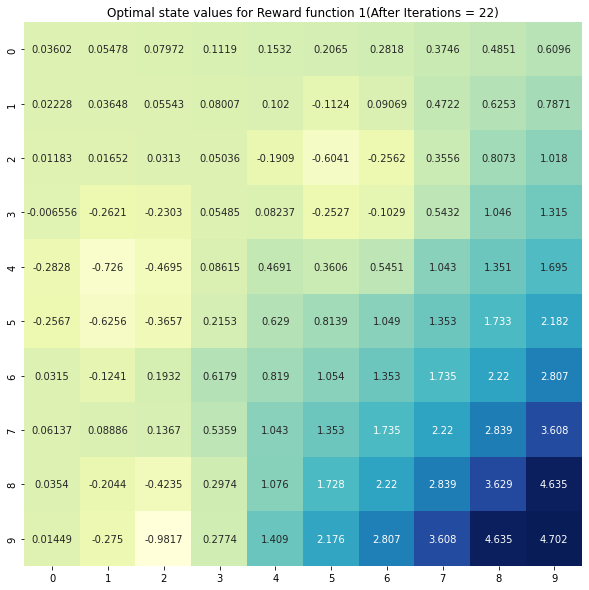

In [9]:
# Plotting optimal value

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 1(After Iterations = 22)")

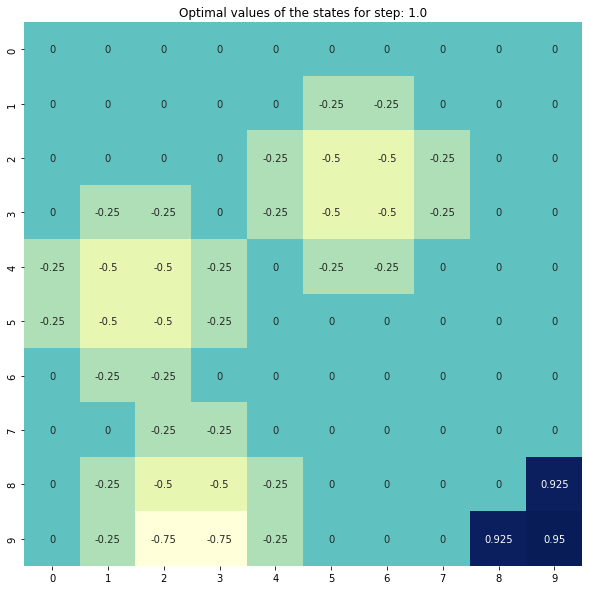

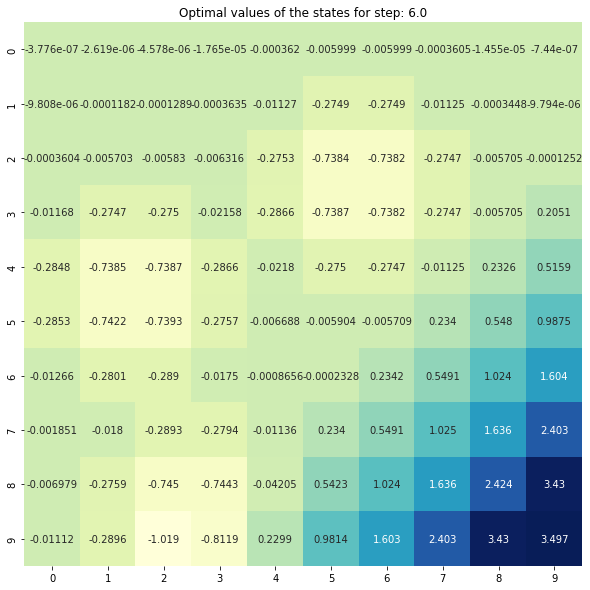

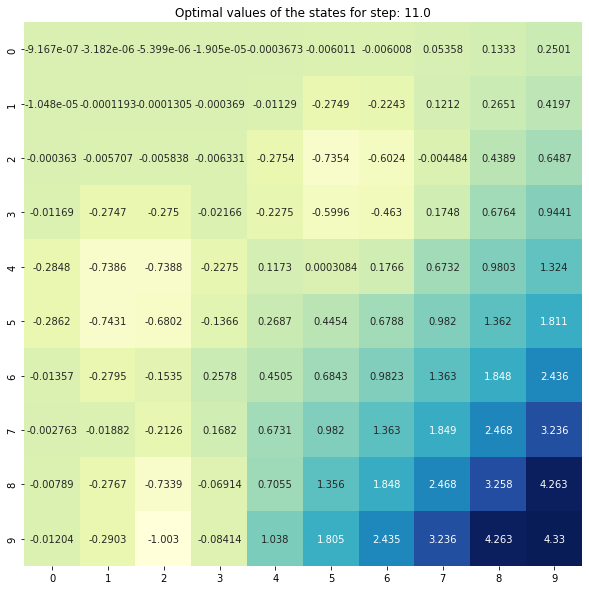

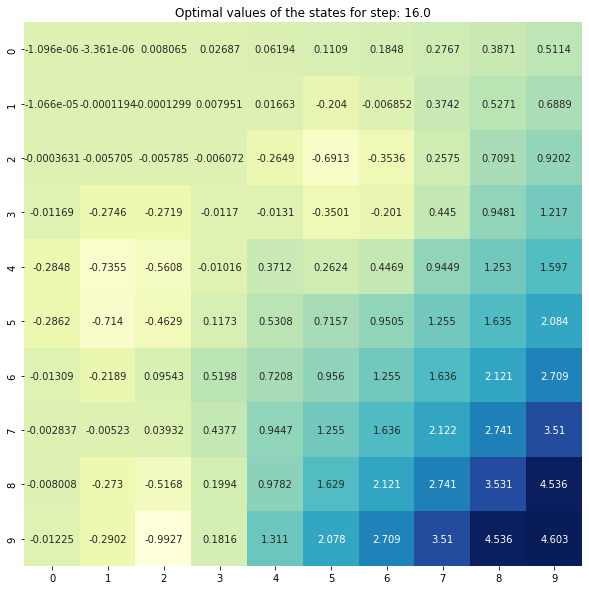

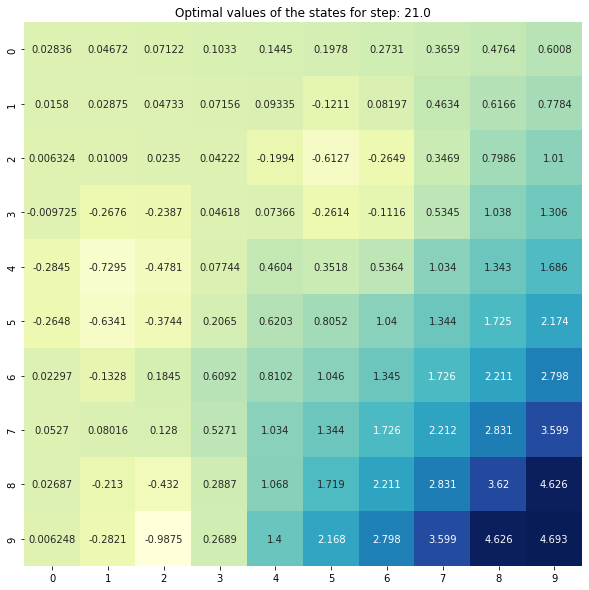

In [10]:
snapshots = value_iteration_with_intervals(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon,optimal_steps=22)

intervals = np.round(np.linspace(1, 21, 5))
for k in range(len(snapshots)):
    N = intervals[k]
    state = snapshots[k]
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
    plt.title("Optimal values of the states for step: "+str(N))
    plt.show()

# Question 3 

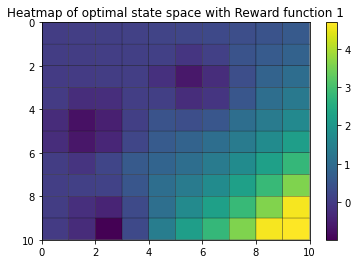

In [11]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward function 1")
plt.show()

# Question 5

In [12]:
def find_policy(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon):
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    plot_arrow(arrows)
    return policy

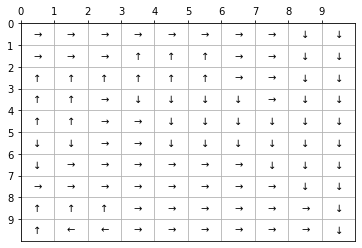

In [13]:
policy = find_policy(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)

# Question 6

Number of steps needed to converge: 32


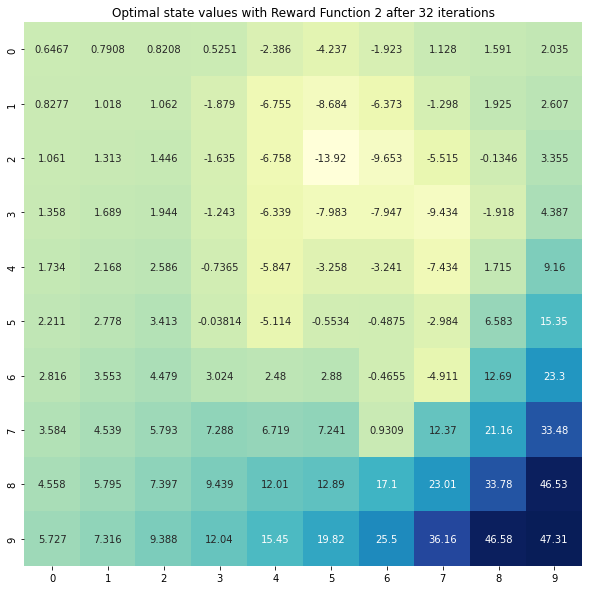

In [14]:
state, steps,_,_,_,_,_=value_iteration(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)

plt.title("Optimal state values with Reward Function 2 after 32 iterations")
plt.show()

# Question 7 

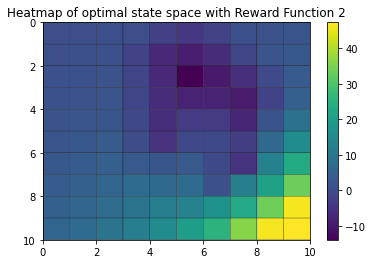

In [15]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 2")
plt.show()

# Question 8

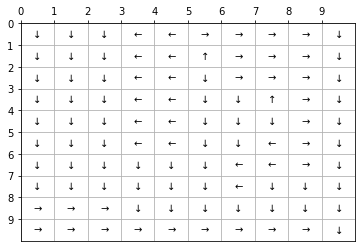

In [16]:
policy = find_policy(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)

# Question 9

In [17]:
w = 0.6

#  testing new w with reward function 1
P_up, P_down, P_left, P_right  = state_transition_probabilities(w)
state, steps,_,_,_,_,_=value_iteration(state_space,reward_fnx1,P_up, P_down, P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 19


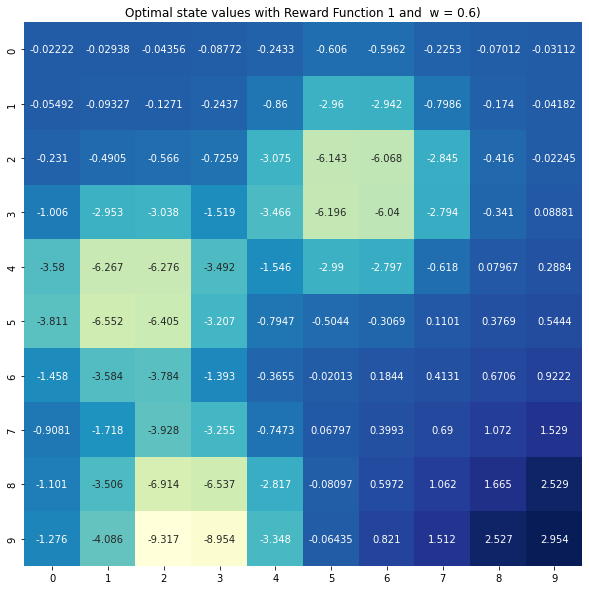

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)

plt.title("Optimal state values with Reward Function 1 and  w = 0.6)")
plt.show()

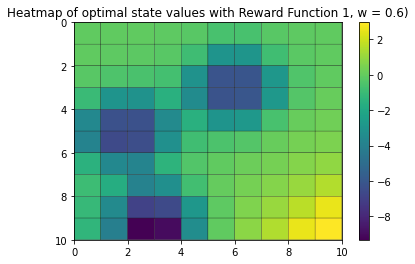

In [19]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state values with Reward Function 1, w = 0.6)")
plt.show()

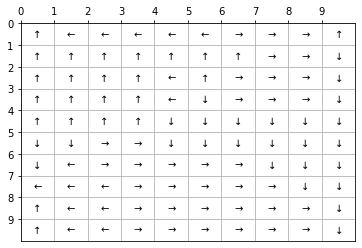

In [20]:
policy = find_policy(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)

In [21]:
# testing new w with reward function 2

state, steps,_,_,_,_,_=value_iteration(state_space,reward_fnx2,P_up, P_down, P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 27


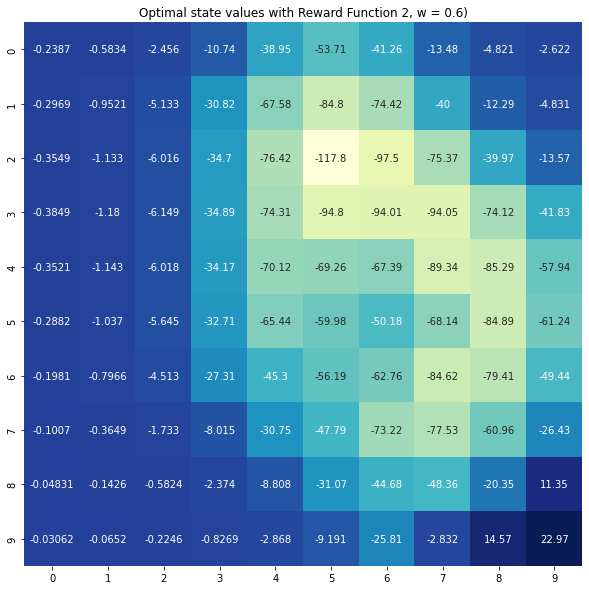

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)

plt.title("Optimal state values with Reward Function 2, w = 0.6)")
plt.show()


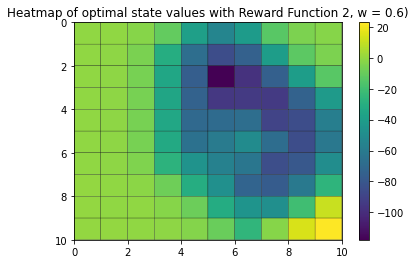

In [23]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state values with Reward Function 2, w = 0.6)")
plt.show()

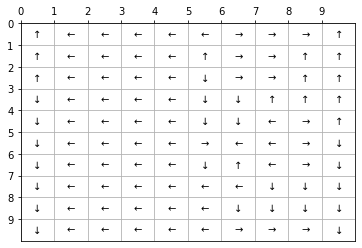

In [24]:
policy = find_policy(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)

# Inverse Reinforcement Learning; Part 4 (Q11-24)

In [25]:
#Import functions to support part 2
from cvxopt import solvers, matrix

## Question 10
Express c, x, D, b in terms of R, Pa, Pa1
, ti
, u, λ and Rmax

## Question 11
 Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of
λ compute OA(s) by following the process described above. For this problem, use the optimal policy of
the agent found in question 5 to fill in the OE(s) values. Then use equation 3 to compute the accuracy
of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ
to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [26]:
#test code before using with Inverse Reinforcement Learning
w = 0.1
gamma = 0.8
epsilon = 0.01
state, steps,_,_,_,_,_ = value_iteration(state_space, reward_fnx2, P_up, P_down, P_left, P_right, w, gamma, epsilon)
for i in range(10):
    for j in range(10):
        c = round(state[j,i],1)
c #check steps

23.0

In [27]:
def value_iteration(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon):
    current_state=np.zeros(100)
    delta=np.inf
    r = (reward_fnx.T).ravel()
    steps = 0
    while(delta>epsilon):
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    copy_of_state = current_state.copy()
    current_state = np.transpose(current_state.reshape(10,10))
    return current_state, steps,up,down,left,right,copy_of_state

In [28]:
#Helper functions for Part 2
def find_policy_irl(state_space, reward_fnx, P_up, P_down, P_left, P_right, w, gamma, epsilon): #no plotting for faster runtime
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    return policy, arrows

def make_D_matrix(o_e, p, ind, gamma, lam, maximum):    
    #initialize empty matricies
    I = np.identity(100)
    zero = np.zeros((300,100))
    identity = np.zeros((300,100))

    counter = 0
    for i in range(100):
        best_p = int(o_e[ind][i])
        for j in range(len(p)):
            if(best_p == j):
                continue
            pa1 = p[best_p]
            pa = p[j]
            inv = np.linalg.inv(I - gamma*pa1)
            zero[counter, :] = np.matmul((pa1[i] - pa[i]).reshape(1,100), inv)
            identity[counter, i] = 1
            counter = counter + 1
    #Initialize the matricies    
    ones = np.zeros((100,1)) + 1
    zero = -zero

    reward = np.vstack((zero, zero, -I, I, I, -I))
    c = np.vstack((np.zeros((100,1)), ones, -lam*ones))
    D = np.hstack((reward, np.vstack((identity, np.zeros((700,100)))), np.vstack((np.zeros((600,100)), -I, -I, np.zeros((200,100))))))

    Rmax = np.zeros((100,1)) + maximum[ind]
    b = np.vstack((np.zeros((800,1)), Rmax, Rmax))
    return c, D, b

def accuracy(policy_pred,p):
    best_acc = 0
    for i in range(len(np.transpose(policy_pred).flatten())):
        if (np.transpose(policy_pred).flatten()[i] == p[i]):
            best_acc = best_acc + 1
    best_acc = best_acc/100.0
    return best_acc

#Use question 5 function find_policy (but edit it to not print plots) to get O_expert
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
p = [P_up, P_down, P_left, P_right] #set up established policies from earlier function

In [29]:
#Use question 2 and 5 to get arrows and polcies for both reward functions--to be used later
policy1, arrows1 = find_policy_irl(state_space, reward_fnx1, P_up, P_down, P_left, P_right, w, gamma, epsilon)
policy2, arrows2 = find_policy_irl(state_space, reward_fnx2, P_up, P_down, P_left, P_right, w, gamma, epsilon)
o_e = [arrows1.T.flatten(), arrows2.T.flatten()] #Optimal Policy array of Expert agent

In [30]:
#Compare penalty coefficient (lambda) and accuracy of the optimal polcies
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
all_accuracies = []
ind = 0   
while(ind < 2):
    accuracy_list = []
    for i, lam in enumerate(lambdas_list):
        c, D, b = make_D_matrix(o_e, p, ind, gamma, lam, maximum)
        solvers.options['show_progress'] = False
        irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
        R_pred = np.array(irl_solve['x'][:100])
        _, policy_pred = find_policy_irl(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

        #Solve for accuracy
        acc=0
        for j in range(len(np.transpose(policy_pred).flatten())):
            if(np.transpose(policy_pred).flatten()[j]==o_e[ind][j]):
                acc = acc+1
        acc = acc/100.0
        
        accuracy_list.append(acc)
    all_accuracies.append(accuracy_list)
    ind = ind + 1

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1')

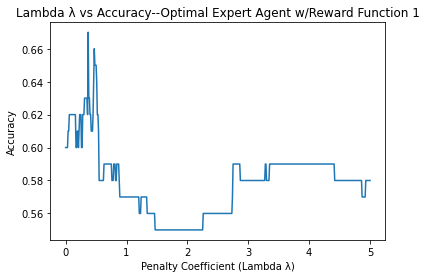

In [31]:
#Plot lambda vs accuracies
plt.plot(lambdas_list, all_accuracies[0])
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1")

## Question 12
 Use the plot in question 11 to compute the value of λ for which accuracy is
maximum. For future reference we will denote this value as λ
(1)
max. Please report λ
(1)
max

In [32]:
#find max
acc_max = np.argmax(all_accuracies[0])
lambda_max = lambdas_list[acc_max]
print('Max Accuracy:', all_accuracies[0][acc_max])
print('Max Lambda Value:', lambda_max)

Max Accuracy: 0.67
Max Lambda Value: 0.37


## Question 13
 For λ
(1)
max, generate heat maps of the ground truth reward and the extracted
reward. Please note that the ground truth reward is the Reward function 1 and the extracted reward is computed by solving the linear program given by equation 2 with the λ parameter set to λ
(1)
max. In this
question, you should have 2 plots.

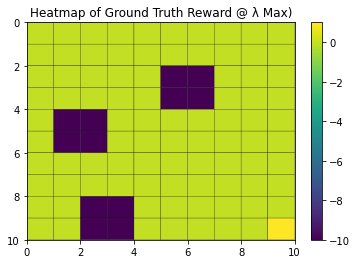

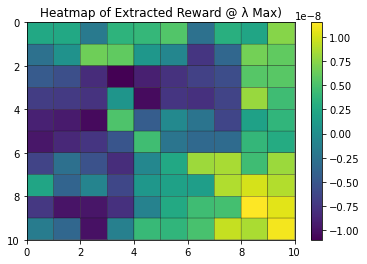

In [33]:
#get the reward function for the extracted reward
c, D, b = make_D_matrix(o_e, p, 0, gamma, lambda_max, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r = (np.array(irl_solve['x'][:100]).reshape(10,10)).T

#Plot heatmaps
plt.pcolor(reward_fnx1, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ Max)")
plt.show()

plt.pcolor(r, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ Max)")
plt.show()

## Question 14
Use the extracted reward function computed in question 13, to compute the
optimal values of the states in the 2-D grid. For computing the optimal values you need to use the
optimal state-value function that you wrote in question 2. For visualization purpose, generate a heat
map of the optimal state values across the 2-D grid (similar to the figure generated in question 3). In
this question, you should have 1 plot.

Text(0.5, 1.0, 'Optimal Values for States in Extracted Reward Function')

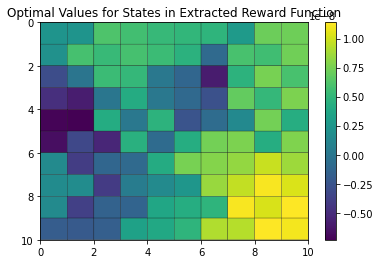

In [34]:
optimal_v,_,_,_,_,_,_ = value_iteration(state_space,r,P_right,P_left,P_up,P_down, 0.1, gamma, epsilon)
plt.pcolor(optimal_v, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Optimal Values for States in Extracted Reward Function")

## Question 15
Compare the heat maps of Question 3 and Question 14 and provide a brief
explanation on their similarities and differences.

## Question 16
Use the extracted reward function found in question 13 to compute the optimal
policy of the agent. For computing the optimal policy of the agent you need to use the function that
you wrote in question 5. For visualization purpose, you should generate a figure similar to that of figure
1 but with the number of state replaced by the optimal action at that state. The actions should be
displayed using arrows. In this question, you should have 1 plot.

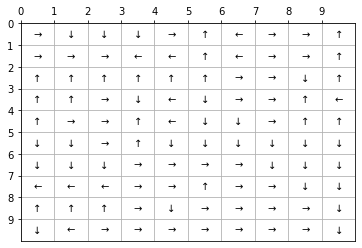

In [35]:
policy = find_policy(state_space, r, P_up, P_down, P_left, P_right, w, gamma, epsilon)

## Question 17
Compare the figures of Question 5 and Question 16 and provide a brief explanation on their similarities and differences.

## Question 18
 Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of
λ compute OA(s) by following the process described above. For this problem, use the optimal policy of
the agent found in question 9 to fill in the OE(s) values. Then use equation 3 to compute the accuracy
of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ
to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [36]:
#Compare penalty coefficient (lambda) and accuracy of the optimal polcies with Reward function 2
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
all_accuracies = []
ind = 0   
while(ind < 2):
    accuracy_list = []
    for i, lam in enumerate(lambdas_list):
        c, D, b = make_D_matrix(o_e, p, ind, gamma, lam, maximum)
        solvers.options['show_progress'] = False
        irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
        R_pred = np.array(irl_solve['x'][:100])
        _, policy_pred = find_policy_irl(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

        #Solve for accuracy
        best_acc = np.sum(arrows2 == policy_pred)/policy_pred.size
        accuracy_list.append(best_acc)
    all_accuracies.append(accuracy_list)
    ind = ind + 1

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2')

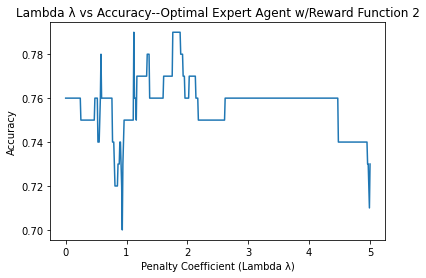

In [37]:
#Plot lambda vs accuracies
plt.plot(lambdas_list, all_accuracies[1])
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2")

## Question 19 
 Use the plot in question 18 to compute the value of λ for which accuracy is
maximum. For future reference we will denote this value as λ
(2)
max. Please report λ
(2)
max

In [38]:
#find max
acc_max2 = np.argmax(all_accuracies[1])
lambda_max2 = lambdas_list[acc_max2]
print('Max 2 Accuracy:', all_accuracies[1][acc_max2])
print('Max Lambda 2 Value:', lambda_max2)

Max 2 Accuracy: 0.79
Max Lambda 2 Value: 1.12


## Question 20
 For λ
(2)
max, generate heat maps of the ground truth reward and the extracted
reward. Please note that the ground truth reward is the Reward function 2 and the extracted reward is
computed by solving the linear program given by equation 2 with the λ parameter set to λ
(2)
max. In this
question, you should have 2 plots.

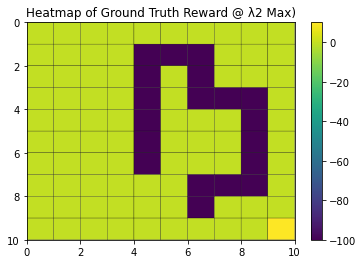

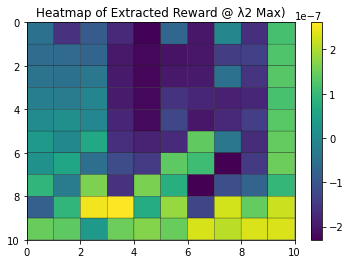

In [39]:
#get the reward function for the extracted reward at reward 2 max
c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max2, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r2 = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ2 Max)")
plt.show()

plt.pcolor(r2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ2 Max)")
plt.show()

## Question 21
Use the extracted reward function computed in question 20, to compute the
optimal values of the states in the 2-D grid. For computing the optimal values you need to use the
optimal state-value function that you wrote in question 2. For visualization purpose, generate a heat
map of the optimal state values across the 2-D grid (similar to the figure generated in question 7). In
this question, you should have 1 plot.

Text(0.5, 1.0, 'Optimal Values for States in Extracted Reward Function 2')

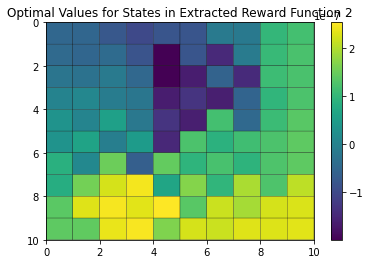

In [40]:
optimal_v,_,_,_,_,_,_ = value_iteration(state_space,r2,P_right,P_left,P_up,P_down, 0.1, gamma, epsilon)
plt.pcolor(optimal_v, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Optimal Values for States in Extracted Reward Function 2")

## Question 22
Compare the heat maps of Question 7 and Question 21 and provide a brief
explanation on their similarities and differences.

## Question 23
Use the extracted reward function found in question 20 to compute the optimal
policy of the agent. For computing the optimal policy of the agent you need to use the function that
you wrote in question 9. For visualization purpose, you should generate a figure similar to that of figure
1 but with the number of state replaced by the optimal action at that state. The actions should be
displayed using arrows. In this question, you should have 1 plot.

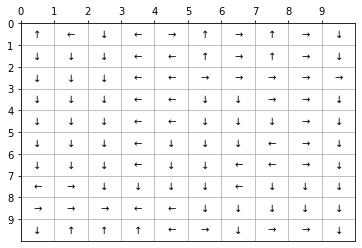

In [41]:
policy = find_policy(state_space, r2, P_up, P_down, P_left, P_right, w, gamma, epsilon)

## Question 24
Compare the figures of Question 9 and Question 23 and provide a brief explanation on their similarities and differences.

## Question 25
From the figure in question 23, you should observe that the optimal policy
of the agent has two major discrepancies. Please identify and provide the causes for these two discrepancies. One of the discrepancy can be fixed easily by a slight modification to the value iteration algorithm.
Perform this modification and re-run the modified value iteration algorithm to compute the optimal
policy of the agent. Also, recompute the maximum accuracy after this modification. Is there a change in maximum accuracy? The second discrepancy is harder to fix and is a limitation of the simple IRL
algorithm.

In [42]:
transition_probabilities = state_transition_probabilities(0.1)

# decreasing epsilon to a low value
epsilon = 1e-12

In [43]:
def find_policy_modified(state_space, reward_fnx, P_up, P_down, P_left, P_right, w, gamma, epsilon): #no plotting for faster runtime
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        
        #right end
        if(s >= 90):
            arr[0] = -np.inf
        
        #left end
        if(s <= 9):
            arr[1] = -np.inf
        
        # top end
        if((s % 10) == 0):
            arr[2] = -np.inf
            
        # bottom end
        if((s % 10) == 9):
            arr[3] = -np.inf
        
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    return policy, arrows



In [44]:
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
p = [P_up, P_down, P_left, P_right] #set up established policies from earlier function

In [45]:
#Use question 2 and 5 to get arrows and polcies for both reward functions--to be used later
policy1, arrows1 = find_policy_modified(state_space, reward_fnx1, P_up, P_down, P_left, P_right, w, gamma, epsilon)
policy2, arrows2 = find_policy_modified(state_space, reward_fnx2, P_up, P_down, P_left, P_right, w, gamma, epsilon)
o_e = [arrows1.T.flatten(), arrows2.T.flatten()] #Optimal Policy array of Expert agent

In [46]:
#Compare penalty coefficient (lambda) and accuracy of the optimal polcies
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
all_accuracies = []
ind = 0   
while(ind < 2):
    accuracy_list = []
    for i, lam in enumerate(lambdas_list):
        c, D, b = make_D_matrix(o_e, p, ind, gamma, lam, maximum)
        solvers.options['show_progress'] = False
        irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
        R_pred = np.array(irl_solve['x'][:100])
        _, policy_pred = find_policy_modified(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

        #Solve for accuracy
        acc=0
        for j in range(len(np.transpose(policy_pred).flatten())):
            if(np.transpose(policy_pred).flatten()[j]==o_e[ind][j]):
                acc = acc+1
        acc = acc/100.0
        
        accuracy_list.append(acc)
    all_accuracies.append(accuracy_list)
    ind = ind + 1

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1')

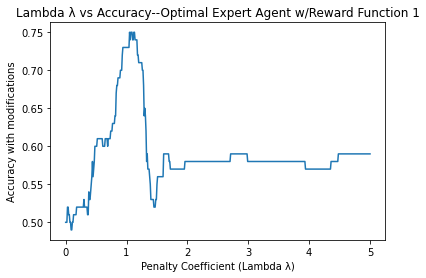

In [47]:
#Plot lambda vs accuracies
plt.plot(lambdas_list, all_accuracies[0])
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy with modifications")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1")

In [48]:
#find max
acc_max = np.argmax(all_accuracies[0])
lambda_max = lambdas_list[acc_max]
print('Max Accuracy:', all_accuracies[0][acc_max])
print('Max Lambda Value:', lambda_max)

Max Accuracy: 0.75
Max Lambda Value: 1.05


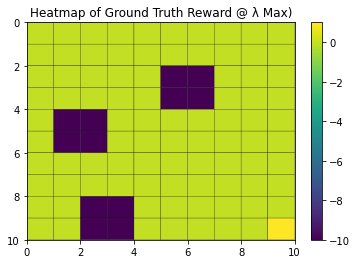

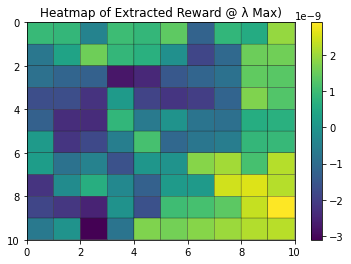

In [49]:
#get the reward function for the extracted reward
c, D, b = make_D_matrix(o_e, p, 0, gamma, lambda_max, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r = (np.array(irl_solve['x'][:100]).reshape(10,10)).T

#Plot heatmaps
plt.pcolor(reward_fnx1, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ Max)")
plt.show()

plt.pcolor(r, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ Max)")
plt.show()

Text(0.5, 1.0, 'Optimal Values for States in Extracted Reward Function')

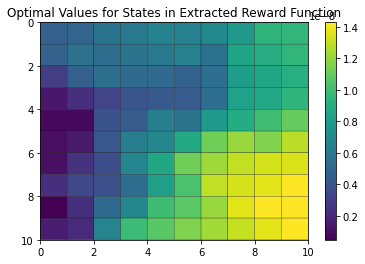

In [50]:
optimal_v,_,_,_,_,_,_ = value_iteration(state_space,r,P_right,P_left,P_up,P_down, 0.1, gamma, epsilon)
plt.pcolor(optimal_v, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Optimal Values for States in Extracted Reward Function")

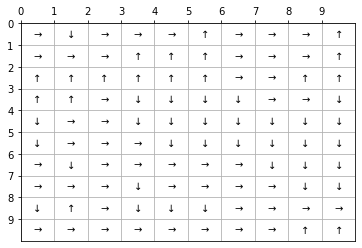

In [51]:
policy = find_policy(state_space, r, P_up, P_down, P_left, P_right, w, gamma, epsilon)

In [52]:
#Compare penalty coefficient (lambda) and accuracy of the optimal polcies with Reward function 2
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
all_accuracies = []
ind = 0   
while(ind < 2):
    accuracy_list = []
    for i, lam in enumerate(lambdas_list):
        c, D, b = make_D_matrix(o_e, p, ind, gamma, lam, maximum)
        solvers.options['show_progress'] = False
        irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
        R_pred = np.array(irl_solve['x'][:100])
        _, policy_pred = find_policy_modified(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

        #Solve for accuracy
        best_acc = np.sum(arrows2 == policy_pred)/policy_pred.size
        accuracy_list.append(best_acc)
    all_accuracies.append(accuracy_list)
    ind = ind + 1

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2')

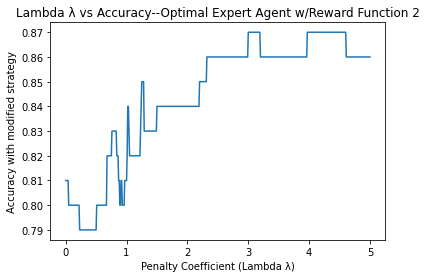

In [53]:
#Plot lambda vs accuracies
plt.plot(lambdas_list, all_accuracies[1])
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy with modified strategy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2")

In [54]:
#find max
acc_max2 = np.argmax(all_accuracies[1])
lambda_max2 = lambdas_list[acc_max2]
print('Max 2 Accuracy:', all_accuracies[1][acc_max2])
print('Max Lambda 2 Value:', lambda_max2)

Max 2 Accuracy: 0.87
Max Lambda 2 Value: 3.0


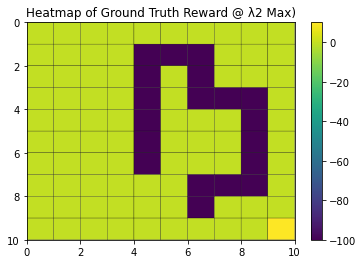

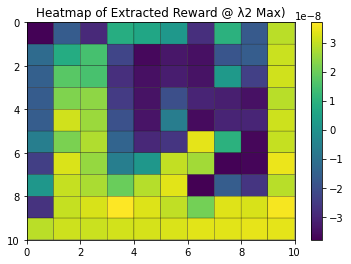

In [55]:
#get the reward function for the extracted reward at reward 2 max
c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max2, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r2 = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ2 Max)")
plt.show()

plt.pcolor(r2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ2 Max)")
plt.show()

Text(0.5, 1.0, 'Optimal Values for States in Extracted Reward Function 2')

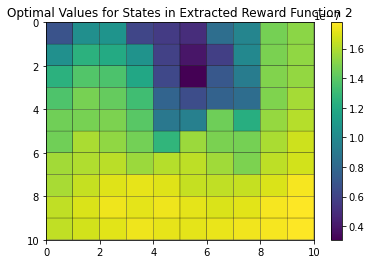

In [56]:
optimal_v,_,_,_,_,_,_ = value_iteration(state_space,r2,P_right,P_left,P_up,P_down, 0.1, gamma, epsilon)
plt.pcolor(optimal_v, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Optimal Values for States in Extracted Reward Function 2")

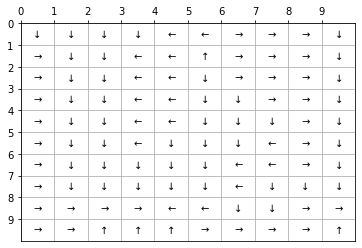

In [57]:
policy = find_policy(state_space, r2, P_up, P_down, P_left, P_right, w, gamma, epsilon)